In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# load the census data

In [81]:
data1 = pd.read_csv("census-data-2000-2009.csv", sep=",", encoding='latin-1')

In [82]:
data1.head()

,sumlev,STATE,COUNTY,place,COUSUB,name,STATENAME,POPCENSUS_2000,POPBASE_2000,POP_2000,POP_2001,POP_2002,POP_2003,POP_2004,POP_2005,POP_2006,POP_2007,POP_2008,POP_2009
0,40,1,0,0,0,Alabama,Alabama,4447100,4447382,4451849,4464034,4472420,4490591,4512190,4545049,4597688,4637904,4677464,4708708
1,162,1,0,124,0,Abbeville city,Alabama,2987,2987,2987,2951,2939,2931,2936,2925,2926,2939,2931,2930
2,162,1,0,460,0,Adamsville city,Alabama,4965,5074,5069,5045,5008,4975,4925,4880,4851,4797,4789,4782
3,162,1,0,484,0,Addison town,Alabama,723,723,724,713,711,708,708,708,713,717,711,709
4,162,1,0,676,0,Akron town,Alabama,521,449,449,450,443,441,433,435,434,437,437,433


In [83]:
data2 = pd.read_csv("census-data-2010-2016.csv", sep=",", encoding='latin-1')

In [84]:
data2.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016
0,40,1,0,0,0,0,0,A,Alabama,Alabama,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,2688,2688,2683,2685,2647,2631,2619,2616,2603
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,4522,4522,4517,4495,4472,4447,4428,4395,4360
3,162,1,0,484,0,0,0,A,Addison town,Alabama,758,756,754,753,748,748,747,740,738
4,162,1,0,676,0,0,0,A,Akron town,Alabama,356,356,355,345,345,342,337,337,334


# convert columns into rows...

In [85]:
data1t = pd.melt(data1, id_vars=["sumlev", "STATE", "COUNTY", "place", "COUSUB", "name", "STATENAME"],
                 var_name="Date", 
                 value_name="Value")

In [86]:
data2t = pd.melt(data2, id_vars=["SUMLEV", "STATE", "COUNTY", "PLACE", "COUSUB", "CONCIT", "PRIMGEO_FLAG", "FUNCSTAT", "NAME", "STNAME"], 
                 var_name="Date", 
                 value_name="Value")

In [87]:
data1t.head()

,sumlev,STATE,COUNTY,place,COUSUB,name,STATENAME,Date,Value
0,40,1,0,0,0,Alabama,Alabama,POPCENSUS_2000,4447100
1,162,1,0,124,0,Abbeville city,Alabama,POPCENSUS_2000,2987
2,162,1,0,460,0,Adamsville city,Alabama,POPCENSUS_2000,4965
3,162,1,0,484,0,Addison town,Alabama,POPCENSUS_2000,723
4,162,1,0,676,0,Akron town,Alabama,POPCENSUS_2000,521


In [88]:
data2t.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,Date,Value
0,40,1,0,0,0,0,0,A,Alabama,Alabama,CENSUS2010POP,4779736
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,CENSUS2010POP,2688
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,CENSUS2010POP,4522
3,162,1,0,484,0,0,0,A,Addison town,Alabama,CENSUS2010POP,758
4,162,1,0,676,0,0,0,A,Akron town,Alabama,CENSUS2010POP,356


# select relevant rows

In [89]:
data1ts = data1t[(data1t.sumlev==162) & (data1t.Date.str.contains("POP_"))].copy()

In [90]:
data1ts.head()

,sumlev,STATE,COUNTY,place,COUSUB,name,STATENAME,Date,Value
163407,162,1,0,124,0,Abbeville city,Alabama,POP_2000,2987
163408,162,1,0,460,0,Adamsville city,Alabama,POP_2000,5069
163409,162,1,0,484,0,Addison town,Alabama,POP_2000,724
163410,162,1,0,676,0,Akron town,Alabama,POP_2000,449
163411,162,1,0,820,0,Alabaster city,Alabama,POP_2000,24099


In [91]:
data2ts = data2t[(data2t.SUMLEV==162) & (data2t.Date.str.contains("POPESTIMATE"))].copy()

In [92]:
data2ts.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,Date,Value
163171,162,1,0,124,0,0,0,A,Abbeville city,Alabama,POPESTIMATE2010,2683
163172,162,1,0,460,0,0,0,A,Adamsville city,Alabama,POPESTIMATE2010,4517
163173,162,1,0,484,0,0,0,A,Addison town,Alabama,POPESTIMATE2010,754
163174,162,1,0,676,0,0,0,A,Akron town,Alabama,POPESTIMATE2010,355
163175,162,1,0,820,0,0,0,A,Alabaster city,Alabama,POPESTIMATE2010,31176


# standardize column set and column names

In [94]:
data1ts.drop(['sumlev','STATE','COUNTY','place','COUSUB'], axis=1, inplace=True)

In [95]:
data1ts.rename(columns={"name": "City", "STATENAME": "State"}, inplace=True)

In [97]:
data1ts.Date = data1ts.Date.str.replace("POP_", "")

In [98]:
data1ts.head()

,City,State,Date,Value
163407,Abbeville city,Alabama,2000,2987
163408,Adamsville city,Alabama,2000,5069
163409,Addison town,Alabama,2000,724
163410,Akron town,Alabama,2000,449
163411,Alabaster city,Alabama,2000,24099


In [100]:
data2ts.drop(['SUMLEV','STATE','COUNTY','PLACE','COUSUB','CONCIT','PRIMGEO_FLAG','FUNCSTAT'], axis=1, inplace=True)

In [102]:
data2ts.rename(columns={"NAME":"City", "STNAME":"State"}, inplace=True)

In [106]:
data2ts.Date = data2ts.Date.str.replace("POPESTIMATE", "")

In [107]:
data2ts.head()

,City,State,Date,Value
163171,Abbeville city,Alabama,2010,2683
163172,Adamsville city,Alabama,2010,4517
163173,Addison town,Alabama,2010,754
163174,Akron town,Alabama,2010,355
163175,Alabaster city,Alabama,2010,31176


# merge the two data sets together

In [108]:
len(data1ts)

195100

In [109]:
len(data2ts)

136570

In [113]:
len(data1ts)+len(data2ts)

331670

In [111]:
frames = [data1ts, data2ts]

In [112]:
data = pd.concat(frames)

In [114]:
len(data)

331670

# show some simple plots

In [136]:
cityName = "New York city"
stateName = "New York"

In [139]:
cityData = data[(data.City==cityName) & (data.State==stateName)]

In [140]:
cityData

,City,State,Date,Value
210234,New York city,New York,2000,8015348
291937,New York city,New York,2001,8063137
373640,New York city,New York,2002,8092749
455343,New York city,New York,2003,8126718
537046,New York city,New York,2004,8169940
618749,New York city,New York,2005,8213839
700452,New York city,New York,2006,8250567
782155,New York city,New York,2007,8310212
863858,New York city,New York,2008,8346794
945561,New York city,New York,2009,8391881


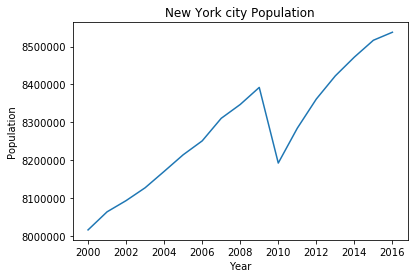

In [141]:
plt.plot(cityData.Date.astype('int'), cityData.Value)
plt.title("{} Population".format(cityName))
plt.ylabel("Population")
plt.xlabel("Year")

In [142]:
locations = [('Baltimore city', 'Maryland'), 
             ('Boston city', 'Massachusetts'), 
             ('New York city', 'New York'), 
             ('Philadelphia city','Pennsylvania'), 
             ('Washington city', 'District of Columbia')]

In [143]:
data.columns

Index(['City', 'State', 'Date', 'Value'], dtype='object')

In [144]:
selection = pd.DataFrame(columns=data.columns)

In [146]:
selection

,City,State,Date,Value


In [147]:
for city, state in locations:
    query = data[(data.City==city) & (data.State==state)]
    frames = [selection, query]
    selection = pd.concat(frames)

In [155]:
print(selection.head(),"\n", selection.tail())

                  City     State  Date   Value
191291  Baltimore city  Maryland  2000  648654
272994  Baltimore city  Maryland  2001  645253
354697  Baltimore city  Maryland  2002  642246
436400  Baltimore city  Maryland  2003  642324
518103  Baltimore city  Maryland  2004  641004 
                    City                 State  Date   Value
331366  Washington city  District of Columbia  2012  635327
412951  Washington city  District of Columbia  2013  649165
494536  Washington city  District of Columbia  2014  659005
576121  Washington city  District of Columbia  2015  670377
657706  Washington city  District of Columbia  2016  681170


# plot the city populations

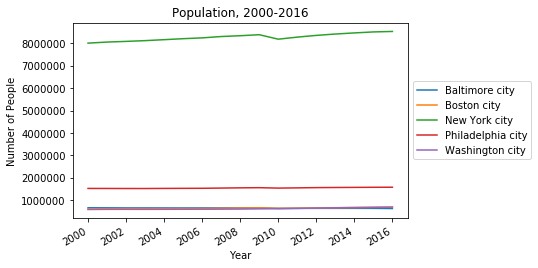

In [264]:
fig = plt.figure()
ax = plt.subplot(111)

legends = []
for key, grp in selection.groupby(['City']): 
    #print("key: {}, grp: {}".format(key, type(grp)))
    x = grp.Date # list([datetime.datetime.strptime(d,'%Y/%m').date() for d in grp.date.values])
    y = grp.Value # list(grp.value.values)
    ax.plot(x, y, label=key)
    legends.append(key)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Population, 2000-2016")
ax.set_ylabel("Number of People")
ax.set_xlabel("Year")
fig.autofmt_xdate()

plt.show()

# plot the city populations using log scale

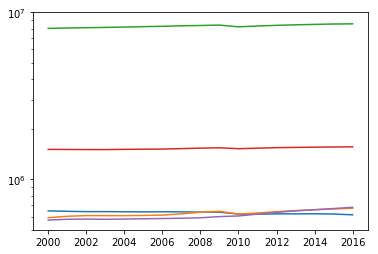

In [158]:
fig, ax = plt.subplots()

for key, grp in selection.groupby(['City']): 
    #print("key: {}, grp: {}".format(key, type(grp)))
    x = grp.Date # list([datetime.datetime.strptime(d,'%Y/%m').date() for d in grp.date.values])
    y = grp.Value # list(grp.value.values)
    ax.set_yscale('log')
    ax.set_ylim(500000, 10000000)
    ax.plot(x, y, label=key)

# plot city populations separately

key: Baltimore city, grp: <class 'pandas.core.frame.DataFrame'>
key: Boston city, grp: <class 'pandas.core.frame.DataFrame'>
key: New York city, grp: <class 'pandas.core.frame.DataFrame'>
key: Philadelphia city, grp: <class 'pandas.core.frame.DataFrame'>
key: Washington city, grp: <class 'pandas.core.frame.DataFrame'>


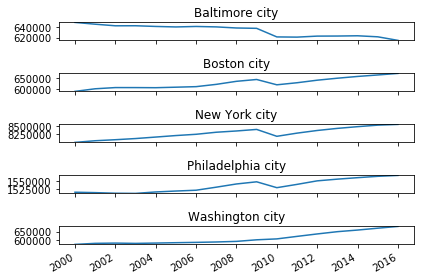

In [252]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(5, sharex=True)
fig.subplots_adjust(hspace=5.0)

count = 0
for key, grp in selection.groupby(['City']): 
    print("key: {}, grp: {}".format(key, type(grp)))
    x = grp.Date # list([datetime.datetime.strptime(d,'%Y/%m').date() for d in grp.date.values])
    y = grp.Value # list(grp.value.values)
    ax = axs[count]
    ax.plot(x, y, label=key)
    ax.set_ylim(min(y), max(y))
    ax.fmt_xdata = mdates.DateFormatter('%Y')
    ax.set_title("{}".format(key))
    #ax.legend(key, loc='upper right', bbox_to_anchor=(1.2, 1.15))
    count += 1

fig.autofmt_xdate()
fig.tight_layout()
plt.show()

key: Baltimore city, grp: <class 'pandas.core.frame.DataFrame'>
key: Boston city, grp: <class 'pandas.core.frame.DataFrame'>
key: New York city, grp: <class 'pandas.core.frame.DataFrame'>
key: Philadelphia city, grp: <class 'pandas.core.frame.DataFrame'>
key: Washington city, grp: <class 'pandas.core.frame.DataFrame'>


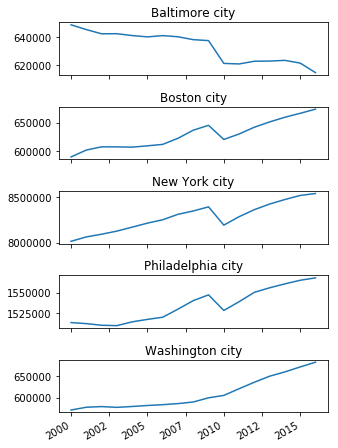

In [254]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.ticker import FormatStrFormatter

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig = plt.figure(figsize=(4.8, 6.4))

count = 1
for key, grp in selection.groupby(['City']): 
    print("key: {}, grp: {}".format(key, type(grp)))
    x = grp.Date  # list([datetime.datetime.strptime(d,'%Y/%m').date() for d in grp.date.values])
    y = grp.Value # list(grp.value.values)
    plt.subplot(5, 1, count)
    plt.title("{}".format(key))
    plt.plot(x, y)
    count += 1

fig.autofmt_xdate()
fig.tight_layout()
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d')) 
plt.show()

# look at population as growth rate

key: Baltimore city, grp: <class 'pandas.core.frame.DataFrame'>
key: Boston city, grp: <class 'pandas.core.frame.DataFrame'>
key: New York city, grp: <class 'pandas.core.frame.DataFrame'>
key: Philadelphia city, grp: <class 'pandas.core.frame.DataFrame'>
key: Washington city, grp: <class 'pandas.core.frame.DataFrame'>


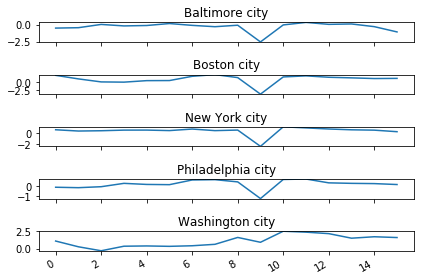

In [263]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(5, sharex=True)
fig.subplots_adjust(hspace=5.0)

count = 0
for key, grp in selection.groupby(['City']): 
    print("key: {}, grp: {}".format(key, type(grp)))
    # x = grp.Date # list([datetime.datetime.strptime(d,'%Y/%m').date() for d in grp.date.values])
    # y = grp.Value # list(grp.value.values)
    deltas = (grp.Value.values[1:] - grp.Value.values[:-1])*100.0
    y = deltas / grp.Value.values[:-1]
    x = np.arange(len(y))
    ax = axs[count]
    ax.plot(x, y, label=key)
    ax.set_ylim(min(y), max(y))
    ax.fmt_xdata = mdates.DateFormatter('%Y')
    ax.set_title("{}".format(key))
    #ax.legend(key, loc='upper right', bbox_to_anchor=(1.2, 1.15))
    count += 1

fig.autofmt_xdate()
fig.tight_layout()
plt.show()